## Sales Dashboard

Below is just some code, this dashboard displays
- the revenue
- for the two customer "status" types "standard" and "premium"
- per day

In [1]:
import pandas as pd

def get_todays_date():
    """ NO NEED TO UNDERSTAND THIS FUNCTION, IT'S JUST A UTILITY FOR LATER...
    The "day" is saved to a file, this function returns the day 
    e.g. "day-1", "day-2",..."""
    dag_path = os.getcwd()
    date_file = open("raw_data/current_day.txt", "r")
    return date_file.readline().strip()

In [2]:
# Read sales data
sales = pd.read_csv("processed_data/agg_sales.csv", header=0)

In [5]:
sales

,Unnamed: 0,sales_date,status,quantity,revenue,user_id
0,0,2022-01-00,premium,4,1,3
1,1,2022-01-00,standard,3,7,3
2,2,2022-01-01,premium,4,11,3
3,3,2022-01-01,standard,3,25,3


In [3]:
# Filter for each status
premium_sales = sales[sales['status'].str.contains("premium")][["revenue","sales_date"]]
std_sales = sales[sales['status'].str.contains("standard")][["revenue","sales_date"]]

## Main Dashboard

<Axes: xlabel='sales_date'>

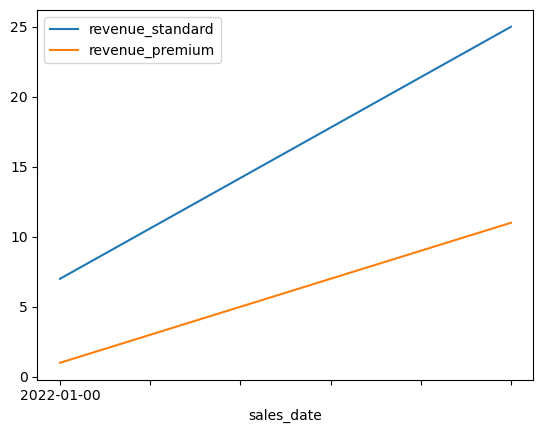

In [4]:
# Plot using pandas wrapper
plot_df=std_sales.merge(premium_sales, on="sales_date", how="left", suffixes=('_standard','_premium'))
plot_df.plot.line(x="sales_date")